#  Phenotypic stability and plasticity in GMP-derived cells as determined by their underlying regulatory network

This R notebook (jupyter) provides the scripts used to construct the figures of the corresponding work. The Boolean Regulatory Network (BRN) logic rules are defined in the regulatoryNetworkGMPModel.txt file (given in the github project). The following block of code is used to give the definitions of the BRN model as well as the molecular patterns that define the Granulocyte-Monocyte derived cells.

In [5]:
# Loading dependencies
library(BoolNet)
library(reshape)
library(ggplot2)

# Loading local scripts
source("scripts/tagAttractorsMatrix.R")
source("scripts/plotAttractors.a.R")
source("scripts/usefulFunctions.R")

# Definition of the full regulatory network model 
net<-loadNetwork("data/regulatoryNetworkGMPModel.txt")

# definition of the phenotype patterns 
monocytes<-c("mcsfr"=1,"pu1"=1)
neutrophils<-c("lf"=1, "cebpa"=1)
eosinophils<-c("fceRIa"=1,"gata1"=1,"cebpa"=1,"ccr3"=1)
basophils<-c("cebpa"=1,"gata2"=1,"runx1"=1,"ccr3"=0)
mast<-c("mitf"=1,"ckit"=1,"cebpa"=0)
Lne<-c("mcsfr"=0,"lf"=0,"mbp"=0,"ckit"=0,"fceRIa"=0,"ccr3"=0)
phenotypes<-list("monocytes"=monocytes,"neutrophils"=neutrophils,"eosinophils"=eosinophils,
                 "mast cells"=mast,"Lne"=Lne,"basophils"=basophils)



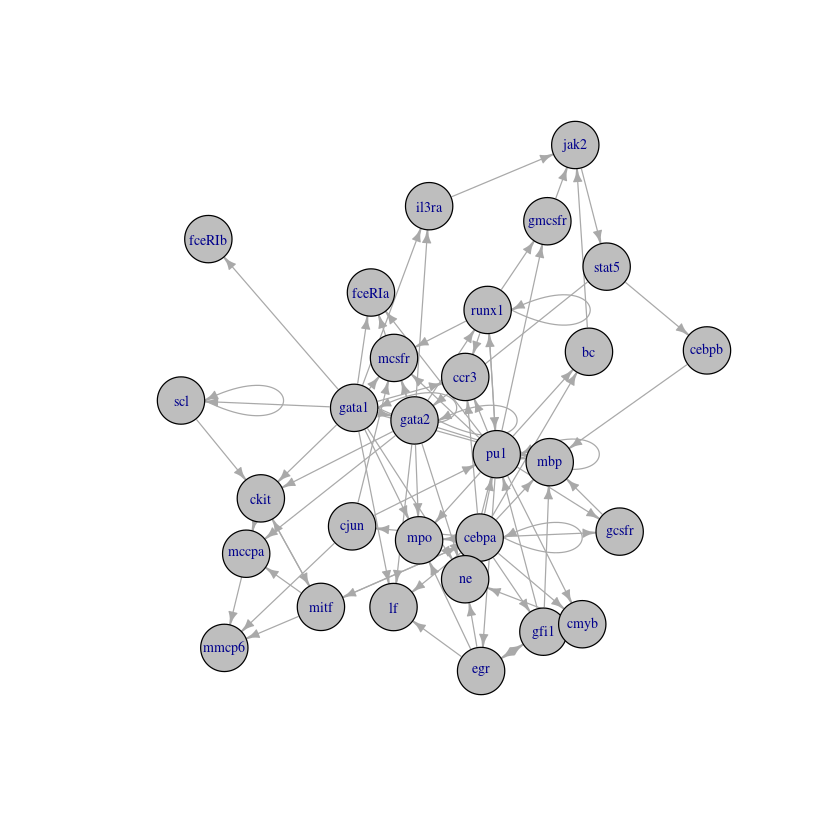

In [6]:
# Plotting the topology of the BRN model
# The figure 1 was edited using igraph
plotNetworkWiring(net)

Then we calculate the attractors of the model. In this case fixed point attractors of the synchronous simulations coincide with being attractors of the asynchronous simulations. Then these attractors are independent of the updating regimen used. To calculate the attractors we used a synchronous exhaustive search using SAT methods implemented in BoolNet.  

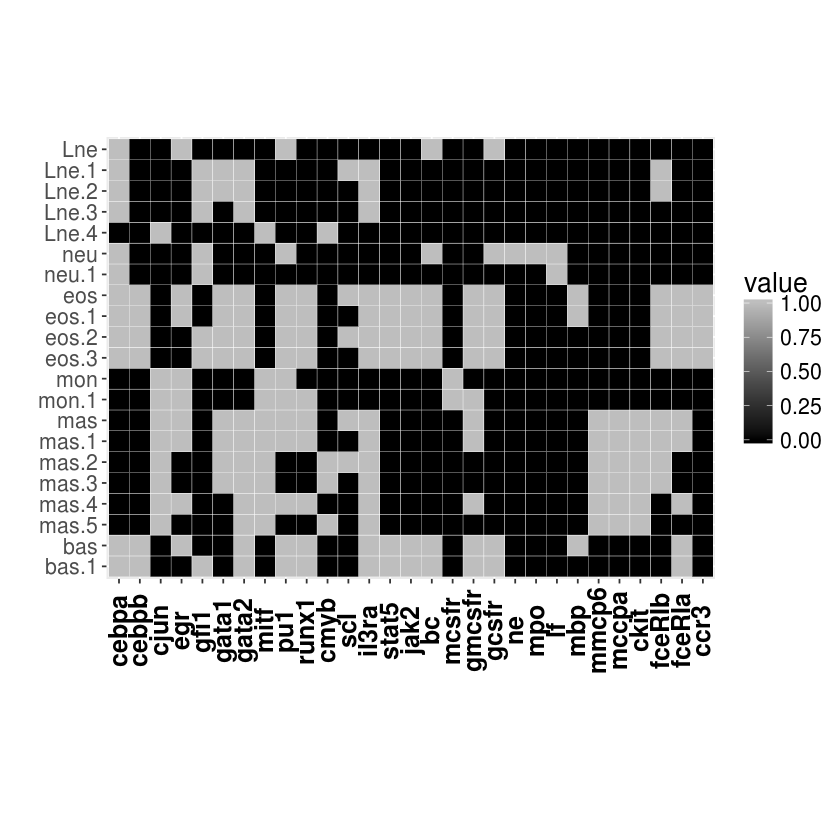

In [22]:
# calculate attractors
attractors<-getAttractors(net, method = "sat.exhaustive")

# tag attractors according to the defintions given at the beginning
taggedAttractors<-tagAttractorsMatrix(net,attractors,phenotypes)

attractors.nm<-colnames(taggedAttractors)
# A "neu/GMP" attractor has a neutrophil pattern, hence it is renamed "neu"
attractors.nm[which("neu/GMP"==attractors.nm)]<-"neu"
# A "GMP/Lne" attractor pattern is renamed as GMP, because it has a progenitor molecular phenotype
#attractors.nm[which("GMP/Lne"==attractors.nm)]<-"GMP"
colnames(taggedAttractors)<-attractors.nm

# Giving order to attractors
Lne<-c(1,11,12,15,17)
neu<-c(2,16)
eos<-c(7,8,9,10)
mon<-c(18,19)
mas<-c(5,6,13,14,20,21)
bas<-c(3,4)
order<-c(Lne,neu,eos,mon,mas,bas)

# Plotting attractors
plotAttractors.a(taggedAttractors,colOrder=TRUE,colIndexes=order)

Where gray (black) bloxes represent that the node is ON (OFF). Attractors where tagged according to the initial definitions. Note that main GMP derived phenotypes are allready present in the attractors patterns. Additionally, we found attractors that does not express any lineage marker and for these reason can be interpreted as immature states.  